In [237]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [238]:
# Load the data from the CSV file
data = pd.read_csv("/resources/vaccinattion_data_by_year.csv")
data.head()

,location,year,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_population
0,Alabama,2021,58.51,47.63,4.903032e+06
1,Alabama,2022,64.83,53.02,4.902810e+06
2,Alabama,2023,65.07,53.22,4.903281e+06
3,Alaska,2021,65.03,56.33,7.314901e+05
4,Alaska,2022,72.75,64.95,7.315601e+05


In [256]:
# Select features and target
X = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), ['year','people_vaccinated_per_hundred', 'total_population']]
y = data.loc[(data['year'] >= 2021) & (data['year'] <= 2022), 'people_fully_vaccinated_per_hundred']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model on data from 2021 and 2022
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [257]:
X_test = data.loc[data['year'] == 2023,['year','people_vaccinated_per_hundred', 'total_population']]
y_test = data.loc[data['year'] == 2023,'people_fully_vaccinated_per_hundred']

In [258]:
X_new_scaled = scaler.transform(X_test)
y_pred = model.predict(X_new_scaled)

In [259]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

3.4968076693877808

In [260]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
r2

0.9609227440938788

In [261]:
# Create a new DataFrame with predicted values
predictions_df = pd.DataFrame({'state': list(predictions.keys()), 'people_vaccinated_per_hundred_prediction_2023': list(predictions.values())})

# Save to CSV file
predictions_df.to_csv('predictions_2023.csv', index=False)

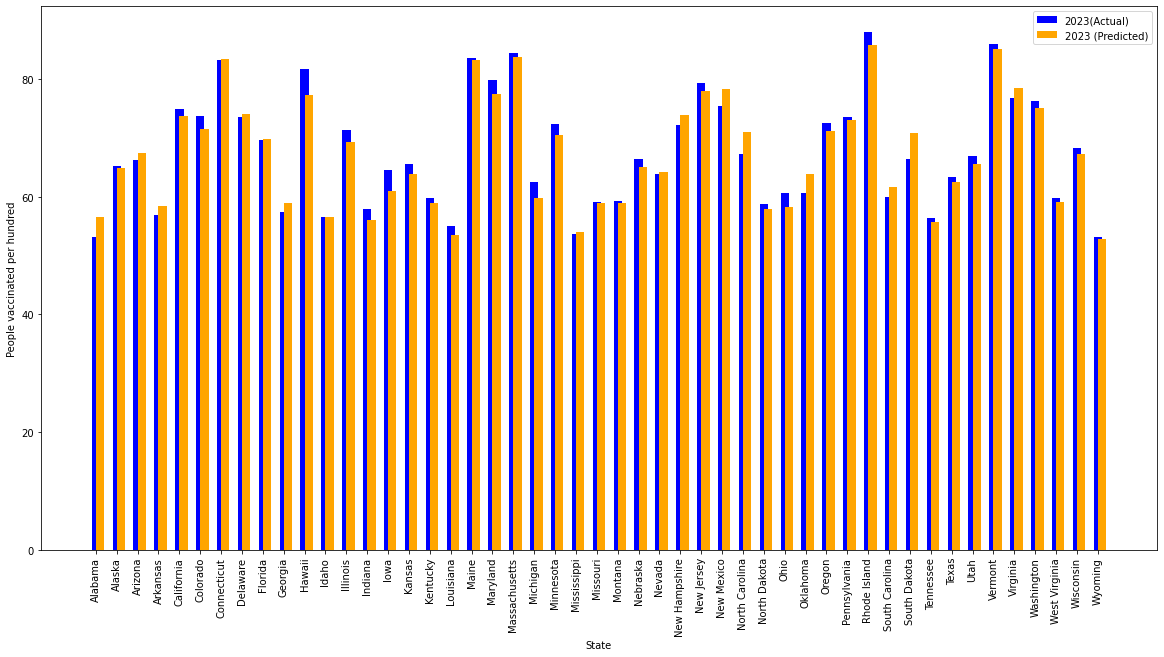

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-coordinates for bars
x1 = np.arange(len(predictions))  # for 2023 values
x2 = x1 + 0.2  # for predicted 2024 values, shifted 0.2 to the right

# Plot bar graph for 2023 and predicted 2024 values
plt.figure(figsize=(20,10))
plt.bar(x1, y_test, 
        color='blue', width=0.4, label='2023(Actual)')
plt.bar(x2, y_pred, 
        color='orange', width=0.4, label='2023 (Predicted)')
plt.xticks(x1, predictions.keys(), rotation=90)
plt.xlabel('State')
plt.ylabel('People vaccinated per hundred')
plt.legend()
plt.show()